In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr

%matplotlib inline

In [2]:
mygridi = np.load('../Grid/igrid_0_-1.npy')
mygridj = np.load('../Grid/jgrid_0_-1.npy')

In [3]:
mymask = np.load('../mask_domain.npy')

In [4]:
ii = np.ma.masked_array(mygridi, mask=1-mymask, dtype='int16')
jj = np.ma.masked_array(mygridj, mask=1-mymask, dtype='int16')

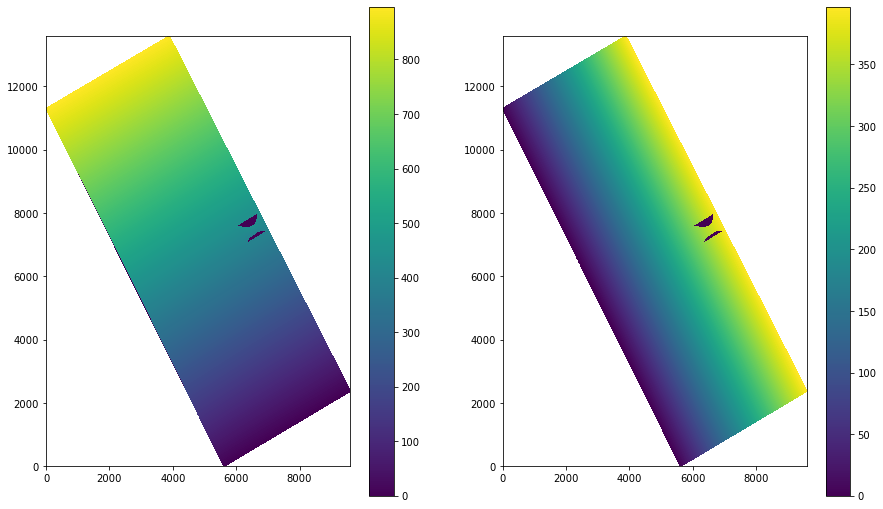

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))
for ax in axs:
    ax.set_aspect(1)
colours = axs[0].pcolormesh(ii[:, :]);
fig.colorbar(colours, ax=axs[0]);
colours = axs[1].pcolormesh(jj[:, :]);
fig.colorbar(colours, ax=axs[1]);


In [6]:
#ma.MaskedArray.filled(fill_value=None)
mygridi = ii.filled(fill_value=-999)

In [7]:
mygridj = jj.filled(fill_value=-999)

In [8]:
decimate_y = 3200
decimate_x = 1890

In [9]:
gridcoords = 'coordinates_seagrid_SalishSea201702.nc'
coords_file = '../../../../grid/'+gridcoords

In [10]:
coords = xr.open_dataset(coords_file, decode_times=False)

In [11]:
lon_max = np.floor(coords.glamt.values.max()*decimate_x)/decimate_x
lon_min = np.floor(coords.glamt.values.min()*decimate_x)/decimate_x

lat_max = np.floor(coords.gphit.values.max()*decimate_y)/decimate_y
lat_min = np.floor(coords.gphit.values.min()*decimate_y)/decimate_y

In [12]:
lons = np.arange(lon_min, lon_max, 1/decimate_x)
lats = np.arange(lat_min, lat_max, 1/decimate_y)

In [13]:
coords = {
        'lons' : lons,
        'lats' : lats,
    }
ii_attrs = {'units': 'grid cells in NEMO SalishSeaCst',
                      'long_name': 'long strait grid'}
jj_attrs = {'units': 'grid cells in NEMO SalishSeaCst',
                      'long_name': 'across strait grid'}
    
filename = 'grid_from_lat_lon.nc'
print (filename)
        
netcdf_title = f'Grid position from lat/lons'
ds_attrs = {
        'acknowledgements':
            'Based on find_closest point',
        'creator_email':
            'sallen@eoas.ubc.ca',
        'creator_name':
            'Salish Sea MEOPAR Project Contributors',
        'creator_url':
            'https://salishsea-meopar-docs.readthedocs.org/',
        'institution':
            'UBC EOAS',
        'institution_fullname': (
            'Earth, Ocean & Atmospheric Sciences,'
            ' University of British Columbia'
        ),
        'title': netcdf_title,
        'history': (
            '[{}] File creation.'
            .format(dt.datetime.today().strftime('%Y-%m-%d'))
        )
        }

grid_from_lat_lon.nc


In [14]:
da = xr.DataArray(
            data = mygridi,
            name='jj',
            dims=('lats', 'lons'),
            coords = coords,
            attrs = ii_attrs)
    

In [15]:
db = xr.DataArray(
            data = mygridj,
            name='ii',
            dims=('lats', 'lons'),
            coords = coords,
            attrs = jj_attrs)
    

ds = xr.Dataset(
            data_vars={
            'jj': da,
            'ii': db},
            coords = coords,
            attrs = ds_attrs
        )
    
encoding = {var: {'zlib': True} for var in ds.data_vars}

ds.to_netcdf(filename, 
            encoding=encoding,)

In [16]:
! ls -lh grid_from_lat_lon.nc

-rw-r--r-- 1 sallen colord 7.8M Feb 25 13:42 grid_from_lat_lon.nc
